In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import seaborn as sns
import re
from convex_optimization import Example_Anaheim, Network, Investors, Consumers
from Transportaion_test_systems import import_matrix, transportation_network_topo

In [84]:
def getNumbers(str):
    array = re.findall(r'[0-9]+', str)
    return array

### Adding results paths

In [85]:
root = (os.getcwd())
results_path = root + '/Results'
directory_contents = sorted(os.listdir(results_path))
results_folders=[]
for item in directory_contents:
    if os.path.isdir(item):
#         print(getNumbers(item))
        results_folders.append(item)
        
final_results_path = os.path.join(results_path, results_folders[-1])
determenistic_result_directory = os.path.dirname(os.getcwd()) + '/script_v8_deterministic_speed_up'

### Figures setup

In [86]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (9, 6)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['lines.linewidth'] = 2
 
mpl.rc('font',family='Times New Roman', size=18)
fnt_size=30
fnt_size2=20
csfont = {'fontname':'Times New Roman',
                  'size': fnt_size,
                 'fontweight':'bold'}
csfont2 = {'fontname':'Times New Roman',
                  'size': fnt_size2}

### Helper functions for reading results

In [87]:
def data_reader(file_name, result_type):
    
    
    scenarios = []
    nodes = []
    value = []
    value_dict={}
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            while("" in row):
                row.remove("")
#         row_numbers = getNumbers(row)
            scenarios.append(int(getNumbers(row[0])[0]))
            nodes.append(int(getNumbers(row[1])[0]))
            value.append(float(row[-1]))
            if result_type == 'stochastic':
                value_dict[int(getNumbers(row[1])[0]), int(getNumbers(row[0])[0])] = float(row[-1])
            elif result_type == 'deterministic':
                value_dict[int(getNumbers(row[1])[0])] = float(row[-1])
            
    value_stochastic_dict= {'Nodes':nodes, 'Scenarios':scenarios, 'Values':value}
    value_stochastic_df = pd.DataFrame(value_stochastic_dict)
            
    return value_stochastic_df, value_dict

def traffic_data_reader(file_name, result_type):
    
    q={}
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            while("" in row):
                row.remove("")
            q[int(getNumbers(row[1])[0]), int(getNumbers(row[2])[0]), int(getNumbers(row[3])[0]), int(getNumbers(row[0])[0])] = float(row[-1])
    return q

# Prices

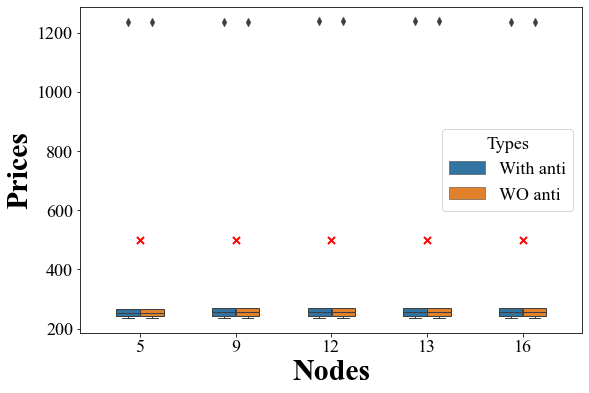

In [94]:
price_file_stochastic = os.path.join(final_results_path, 'Resulting_prices_with_anti.csv')
price_file_stochastic_wo_anti = os.path.join(final_results_path, 'Resulting_prices_with_no_anti.csv')
price_file_deterministic = os.path.join(determenistic_result_directory, 'Results_prices.csv')


prices_stochastic_df, rho_stochastic = data_reader(file_name=price_file_stochastic,result_type='stochastic')

prices_stochastic_wo_anti_df, rho_stochastic_wo_anti = data_reader(file_name=price_file_stochastic_wo_anti,result_type='stochastic')

combined_prices_df = pd.DataFrame()
combined_prices_df['Nodes'] = list(prices_stochastic_df.Nodes) + list(prices_stochastic_wo_anti_df.Nodes)
combined_prices_df['Scenarios'] = list(prices_stochastic_df.Scenarios) + list(prices_stochastic_wo_anti_df.Scenarios)
combined_prices_df['Values'] = list(prices_stochastic_df.Values) + list(prices_stochastic_wo_anti_df.Values)
combined_prices_df['Types'] = ['With anti']*len(prices_stochastic_df.Nodes) + ['WO anti']*len(prices_stochastic_wo_anti_df.Nodes)


prices_deterministic_df, rho_deterministic = data_reader(file_name=price_file_deterministic,result_type='deterministic')

fig, ax = plt.subplots()
ax = sns.boxplot(x='Nodes', y='Values', data=combined_prices_df, hue='Types', linewidth=1, width=0.5)
ax.scatter(range(len(prices_deterministic_df.Nodes)),prices_deterministic_df.Values, marker='x', color='red', s=50)
ax.set_xlabel("Nodes",**csfont)
ax.set_ylabel("Prices",**csfont);

# legend = plt.legend(loc='best', bbox_to_anchor=(0.6, 0.5, 0, 0) ,ncol=2, title='Nodes',fontsize=20, frameon=False)

In [95]:
combined_prices_df

,Nodes,Scenarios,Values,Types
0,5,1,236.122206,With anti
1,9,1,236.772145,With anti
2,13,1,236.936982,With anti
3,12,1,236.931170,With anti
4,16,1,236.828558,With anti
5,5,2,1234.649252,With anti
6,9,2,1237.131792,With anti
7,13,2,1237.760307,With anti
8,12,2,1237.738151,With anti
9,16,2,1237.346938,With anti


# Services (g)

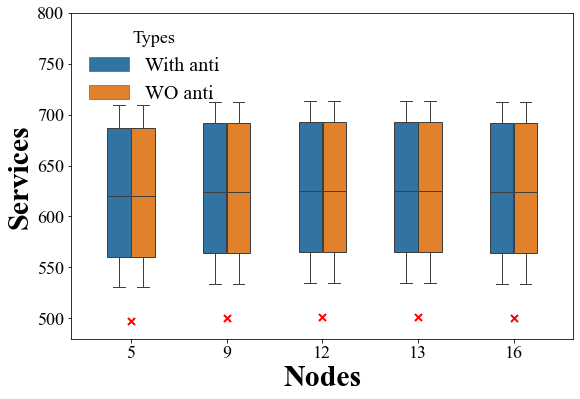

In [97]:
service_file_stochastic = os.path.join(final_results_path, 'Resulting_services_with_anti.csv')
service_file_stochastic_wo_anti = os.path.join(final_results_path, 'Resulting_services_with_no_anti.csv')
service_file_deterministic = os.path.join(determenistic_result_directory, 'Results_services.csv')


services_df_stochastic, g_stochastic = data_reader(file_name=service_file_stochastic,result_type='stochastic')
services_df_stochastic_wo_anti, g_stochastic_wo_anti = data_reader(file_name=service_file_stochastic_wo_anti,result_type='stochastic')
combined_services_df = pd.DataFrame()
combined_services_df['Nodes'] = list(services_df_stochastic.Nodes) + list(services_df_stochastic_wo_anti.Nodes)
combined_services_df['Scenarios'] = list(services_df_stochastic.Scenarios) + list(services_df_stochastic_wo_anti.Scenarios)
combined_services_df['Values'] = list(services_df_stochastic.Values) + list(services_df_stochastic_wo_anti.Values)
combined_services_df['Types'] = ['With anti']*len(services_df_stochastic.Nodes) + ['WO anti']*len(services_df_stochastic_wo_anti.Nodes)

services_df_deterministic, g_deterministic = data_reader(file_name=service_file_deterministic,result_type='deterministic') 

fig, ax = plt.subplots()
ax = sns.boxplot(x='Nodes', y='Values', data=combined_services_df, hue='Types', linewidth=1, width=0.5)
ax.scatter(range(len(services_df_deterministic.Nodes)), services_df_deterministic.Values, color='red', marker ='x', s=50)
ax.set_ylim(480,800)
ax.set_xlabel("Nodes",**csfont)
ax.set_ylabel("Services",**csfont);
legend = plt.legend(loc='upper left',  title='Types',fontsize=20, frameon=False);

# Capacity

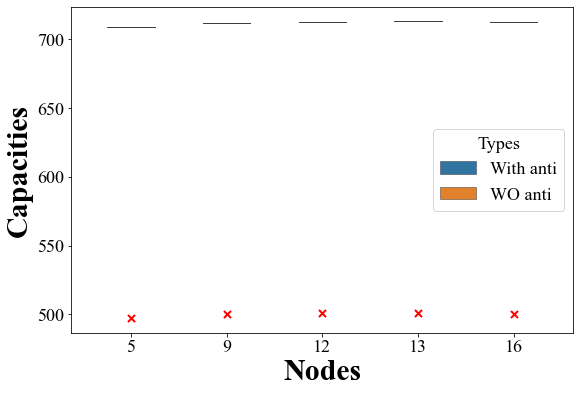

In [98]:
capacities_file_stochastic = os.path.join(final_results_path, 'Resulting_capacities_with_anti.csv')
capacities_file_stochastic_wo_anti = os.path.join(final_results_path, 'Resulting_capacities_with_no_anti.csv')
capacity_file_deterministic = os.path.join(determenistic_result_directory, 'Results_capacity.csv')

capacity_df_stochastic, c_stochastic = data_reader(file_name=capacities_file_stochastic,result_type='stochastic')
capacity_df_stochastic_wo_anti, c_stochastic_wo_anti = data_reader(file_name=capacities_file_stochastic_wo_anti,result_type='stochastic')
combined_capacity_df = pd.DataFrame()
combined_capacity_df['Nodes'] = list(capacity_df_stochastic.Nodes) + list(capacity_df_stochastic_wo_anti.Nodes)
combined_capacity_df['Scenarios'] = list(capacity_df_stochastic.Scenarios) + list(capacity_df_stochastic_wo_anti.Scenarios)
combined_capacity_df['Values'] = list(capacity_df_stochastic.Values) + list(capacity_df_stochastic_wo_anti.Values)
combined_capacity_df['Types'] = ['With anti']*len(capacity_df_stochastic.Nodes) + ['WO anti']*len(capacity_df_stochastic_wo_anti.Nodes)


capacity_df_deterministic, c_deterministic = data_reader(file_name=capacity_file_deterministic,result_type='deterministic')
ax.scatter(range(len(capacity_df_deterministic.Nodes)), capacity_df_deterministic.Values, color='red', marker ='x', s=50)

fig, ax = plt.subplots()
ax = sns.boxplot(x='Nodes', y='Values', data=combined_capacity_df, hue= 'Types', linewidth=1, width=0.5)
ax.scatter(range(len(nodes_deterministic)), capacities_deterministic, color='red', marker ='x', s=50)
ax.set_xlabel("Nodes",**csfont)
ax.set_ylabel("Capacities",**csfont);

# Traffic

In [69]:
Traffic_file_stochastic = os.path.join(final_results_path, 'Resulting_traffic_with_anti.csv')
Traffic_file_stochastic_wo_anti = os.path.join(final_results_path, 'Resulting_traffic_with_no_anti.csv')
Traffic_file_deterministic = os.path.join(determenistic_result_directory, 'Results_traffic.csv')

q_stochastic = traffic_data_reader(Traffic_file_stochastic,'stochastic')
q_stochastic_wo_anti = traffic_data_reader(Traffic_file_stochastic_wo_anti,'stochastic')
q_deterministic = traffic_data_reader(Traffic_file_deterministic,'deterministic')

# Surpluss analysis

In [96]:
congestion = False 
identical_scen = False 
Ntw = Example_Anaheim(identical_scen, congestion)


growth at scen  1 :  1.0671821220562006
growth at scen  2 :  1.4237168684686163
growth at scen  3 :  1.381887309488307
growth at scen  4 :  1.127534512869711
growth at scen  5 :  1.2477175435459704


In [82]:
Investors_total_cost = sum (Ntw.Scn.pr[u] *(
    (Ntw.I.ca*c_stochastic[k,u]**2 + Ntw.I.cb*c_stochastic[k,u]) +
    (Ntw.I.ga*g_stochastic[k,u]**2+Ntw.I.gb*g_stochastic[k,u])) for k in Ntw.I.K for u in Ntw.Scn.U)

Investors_total_cost_wo_anti = sum (Ntw.Scn.pr[u] *(
    (Ntw.I.ca*c_stochastic_wo_anti[k,u]**2 + Ntw.I.cb*c_stochastic_wo_anti[k,u]) +
    (Ntw.I.ga*g_stochastic_wo_anti[k,u]**2+Ntw.I.gb*g_stochastic_wo_anti[k,u])) for k in Ntw.I.K for u in Ntw.Scn.U)

In [ ]:
Investors_objective = sum(Ntw.Scn.pr[u] *( 
    sum(rho_stochastic[k,u]*g_stochastic[k,u] -
        (Ntw.I.ca*c_stochastic[k,u]**2 + Ntw.I.cb*c_stochastic[k,u]) - 
        (Ntw.I.ga*g_stochastic[k,u]**2+Ntw.I.gb*g_stochastic[k,u])) for k in Ntw.I.K for u in Ntw.Scn.U))

Investors_objective_wo_anti = sum(Ntw.Scn.pr[u] *( 
    sum(rho_stochastic_wo_anti[k,u]*g_stochastic_wo_anti[k,u] -
        (Ntw.I.ca*c_stochastic_wo_anti[k,u]**2 + Ntw.I.cb*c_stochastic_wo_anti[k,u]) - 
        (Ntw.I.ga*g_stochastic_wo_anti[k,u]**2+Ntw.I.gb*g_stochastic_wo_anti[k,u])) for k in Ntw.I.K for u in Ntw.Scn.U))

In [97]:
utility[r,s,k,u] = self.b0[k] - self.b1*ADMM.tt[u][r,s,k] + self.b2*ADMM.c[u,k] - self.b3*ADMM.rho[u,k]

1000001.7318072894

# EVPI analysis

## Investors

In [ ]:
EVPI_investors = Investors_objective - Investors_objective_wo_anti

## Consumers 